BDAT 1004 - Problem Set 3

Question 1

In [3]:
import pandas as pd
import numpy as np


In [5]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')


In [7]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [9]:
male_ratio = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean()).sort_values(ascending=False)
print(male_ratio)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [11]:
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [13]:
mean_age_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [15]:
gender_percentage = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage = (gender_percentage.div(gender_percentage.sum(axis=1), axis=0) * 100).round(2)
print(gender_percentage)


gender             F       M
occupation                  
administrator  45.57   54.43
artist         46.43   53.57
doctor          0.00  100.00
educator       27.37   72.63
engineer        2.99   97.01
entertainment  11.11   88.89
executive       9.38   90.62
healthcare     68.75   31.25
homemaker      85.71   14.29
lawyer         16.67   83.33
librarian      56.86   43.14
marketing      38.46   61.54
none           44.44   55.56
other          34.29   65.71
programmer      9.09   90.91
retired         7.14   92.86
salesman       25.00   75.00
scientist       9.68   90.32
student        30.61   69.39
technician      3.70   96.30
writer         42.22   57.78


Question 2

In [18]:
import pandas as pd


In [20]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)


In [22]:
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [24]:
num_teams = euro12['Team'].nunique()
print(num_teams)


16


In [26]:
num_columns = euro12.shape[1]
print(num_columns)


35


In [28]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [30]:
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_teams)


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [32]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(mean_yellow_cards)


7.4375


In [34]:
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams)


       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [36]:
teams_with_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_with_g)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [38]:
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [40]:
all_except_last_3 = euro12.iloc[:, :-3]
print(all_except_last_3)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [42]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3

In [45]:
import pandas as pd
import numpy as np


In [47]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [49]:
housing_df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})
print(housing_df.head())


   bedrs  bathrs  price_sqr_meter
0      1       3            20864
1      2       1            11126
2      2       2            11323
3      4       1            10505
4      4       1            21667


In [51]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn_df)


     bigcolumn
0            1
1            2
2            2
3            4
4            4
..         ...
295      19074
296      25038
297      16281
298      15710
299      23586

[300 rows x 1 columns]


In [53]:
print(bigcolumn_df.index.max())


299


In [55]:
bigcolumn_df = bigcolumn_df.reindex(range(300))
print(bigcolumn_df.tail())


     bigcolumn
295      19074
296      25038
297      16281
298      15710
299      23586


Question 5

In [67]:
import pandas as pd


In [69]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')


In [71]:
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [73]:
num_observations = chipo.shape[0]
print(num_observations)


4622


In [75]:
num_columns = chipo.shape[1]
print(num_columns)


5


In [77]:
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [79]:
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


In [81]:
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print(most_ordered_item)


Chicken Bowl


In [83]:
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()
print(most_ordered_quantity)


761


In [85]:
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_choice)


[Diet Coke]


In [87]:
total_items = chipo['quantity'].sum()
print(total_items)


4972


In [89]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


In [91]:
print(chipo['item_price'].dtype)


float64


In [93]:
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print(revenue)


39237.02


In [95]:
num_orders = chipo['order_id'].nunique()
print(num_orders)


1834


In [97]:
avg_revenue_per_order = revenue / num_orders
print(avg_revenue_per_order)


21.39423118865867


In [99]:
num_items_sold = chipo['item_name'].nunique()
print(num_items_sold)


50


Question 6

In [102]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [104]:
data = {
    'Year': [1867, 1900, 1950, 2000, 2014],
    'Marriages_per_Capita': [9.8, 8.7, 10.6, 8.2, 6.9],
    'Divorces_per_Capita': [0.3, 0.5, 2.2, 4.1, 3.6]
}
df = pd.DataFrame(data)


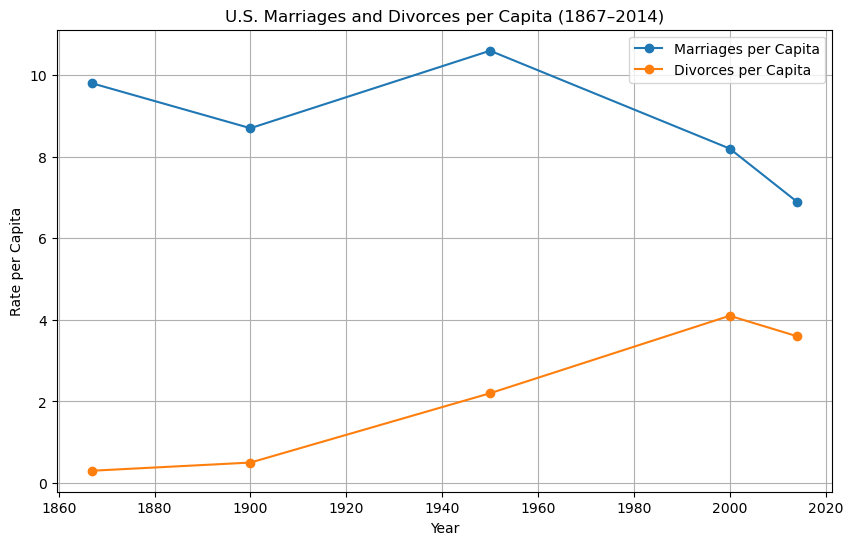

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Marriages_per_Capita'], label='Marriages per Capita', marker='o')
plt.plot(df['Year'], df['Divorces_per_Capita'], label='Divorces per Capita', marker='o')
plt.title('U.S. Marriages and Divorces per Capita (1867–2014)')
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.legend()
plt.grid(True)
plt.show()


Question 7

In [109]:
data = {
    'Year': [1900, 1950, 2000],
    'Marriages_per_Capita': [8.7, 10.6, 8.2],
    'Divorces_per_Capita': [0.5, 2.2, 4.1]
}
df = pd.DataFrame(data)


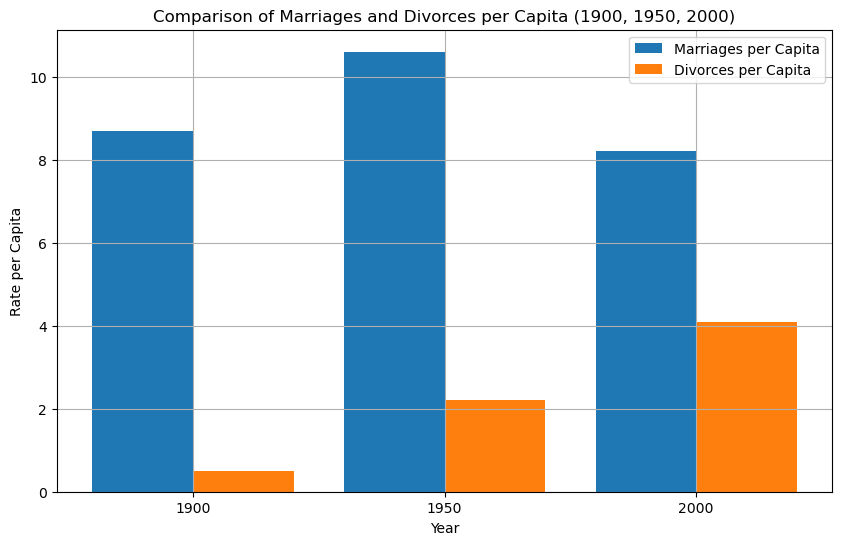

In [111]:
x = range(len(df['Year']))
plt.figure(figsize=(10, 6))
plt.bar(x, df['Marriages_per_Capita'], width=0.4, label='Marriages per Capita', align='center')
plt.bar([p + 0.4 for p in x], df['Divorces_per_Capita'], width=0.4, label='Divorces per Capita', align='center')
plt.xticks([p + 0.2 for p in x], df['Year'])
plt.title('Comparison of Marriages and Divorces per Capita (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.legend()
plt.grid(True)
plt.show()


Question 8

In [114]:
data = {
    'Actor': ['Actor A', 'Actor B', 'Actor C', 'Actor D', 'Actor E'],
    'Kill_Count': [150, 120, 100, 80, 60]
}
df = pd.DataFrame(data)


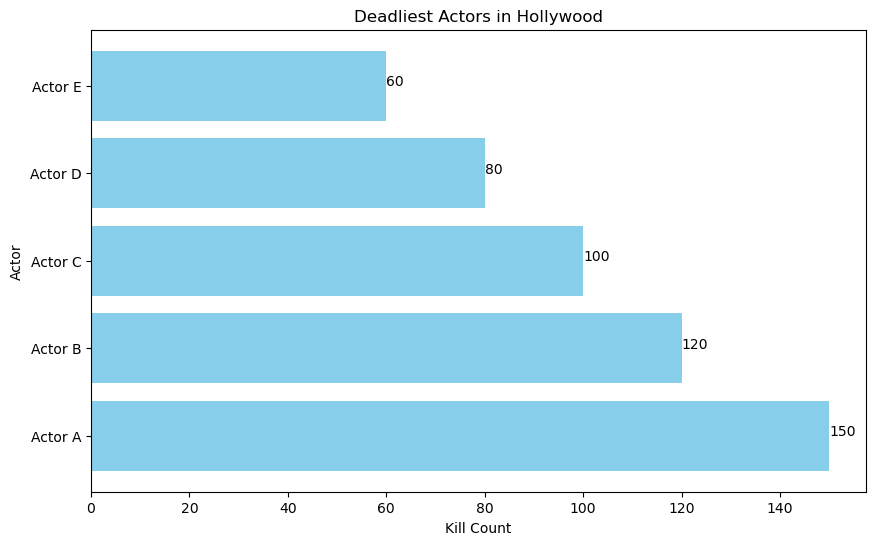

In [116]:
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Kill_Count'], color='skyblue')
plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
for index, value in enumerate(df['Kill_Count']):
    plt.text(value, index, str(value))
plt.show()


Question 9

In [119]:
data = {
    'Category': ['Assassinated', 'Natural Causes', 'Other'],
    'Count': [43, 25, 15]
}
df = pd.DataFrame(data)


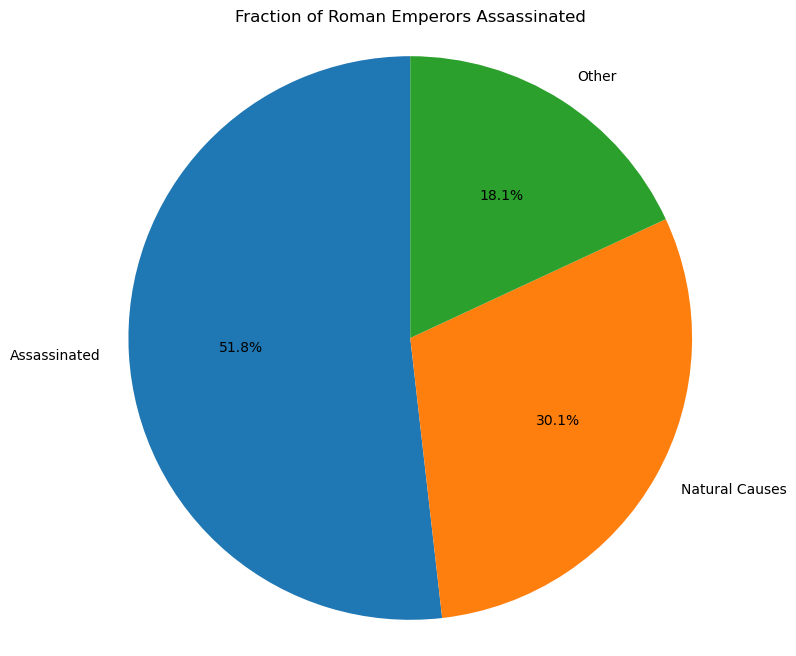

In [121]:
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


Question 10

In [124]:
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Arcade_Revenue': [3.5, 3.7, 4.0, 4.1, 4.3, 4.5, 4.7, 4.9, 5.0, 5.2],
    'CS_PhDs': [1000, 1100, 1150, 1200, 1300, 1350, 1400, 1450, 1500, 1550]
}
df = pd.DataFrame(data)


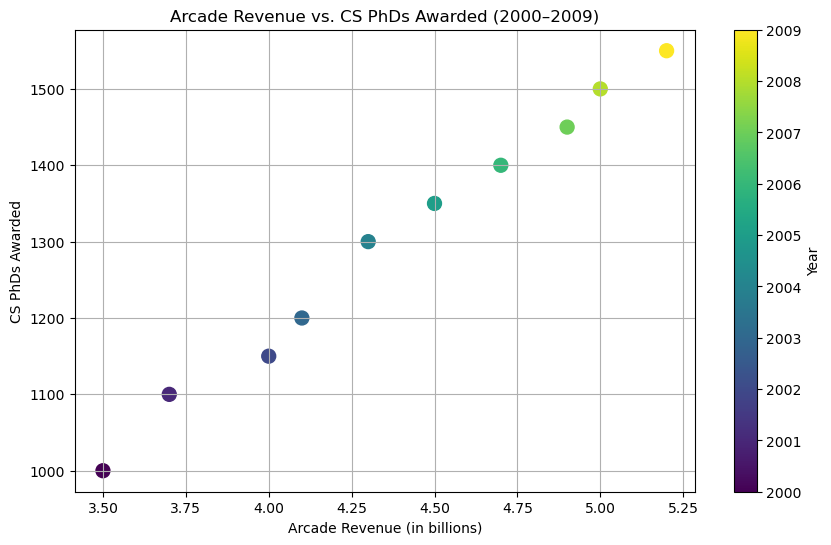

In [126]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Arcade_Revenue'], df['CS_PhDs'], c=df['Year'], cmap='viridis', s=100)
plt.title('Arcade Revenue vs. CS PhDs Awarded (2000–2009)')
plt.xlabel('Arcade Revenue (in billions)')
plt.ylabel('CS PhDs Awarded')
plt.colorbar(scatter, label='Year')
plt.grid(True)
plt.show()
